# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [267]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [268]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_test))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [269]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import numpy as np
import collections
import matplotlib.pyplot as plt
import random
import csv
# Visualizations will be shown in the notebook.
%matplotlib inline

Showing random sample images.


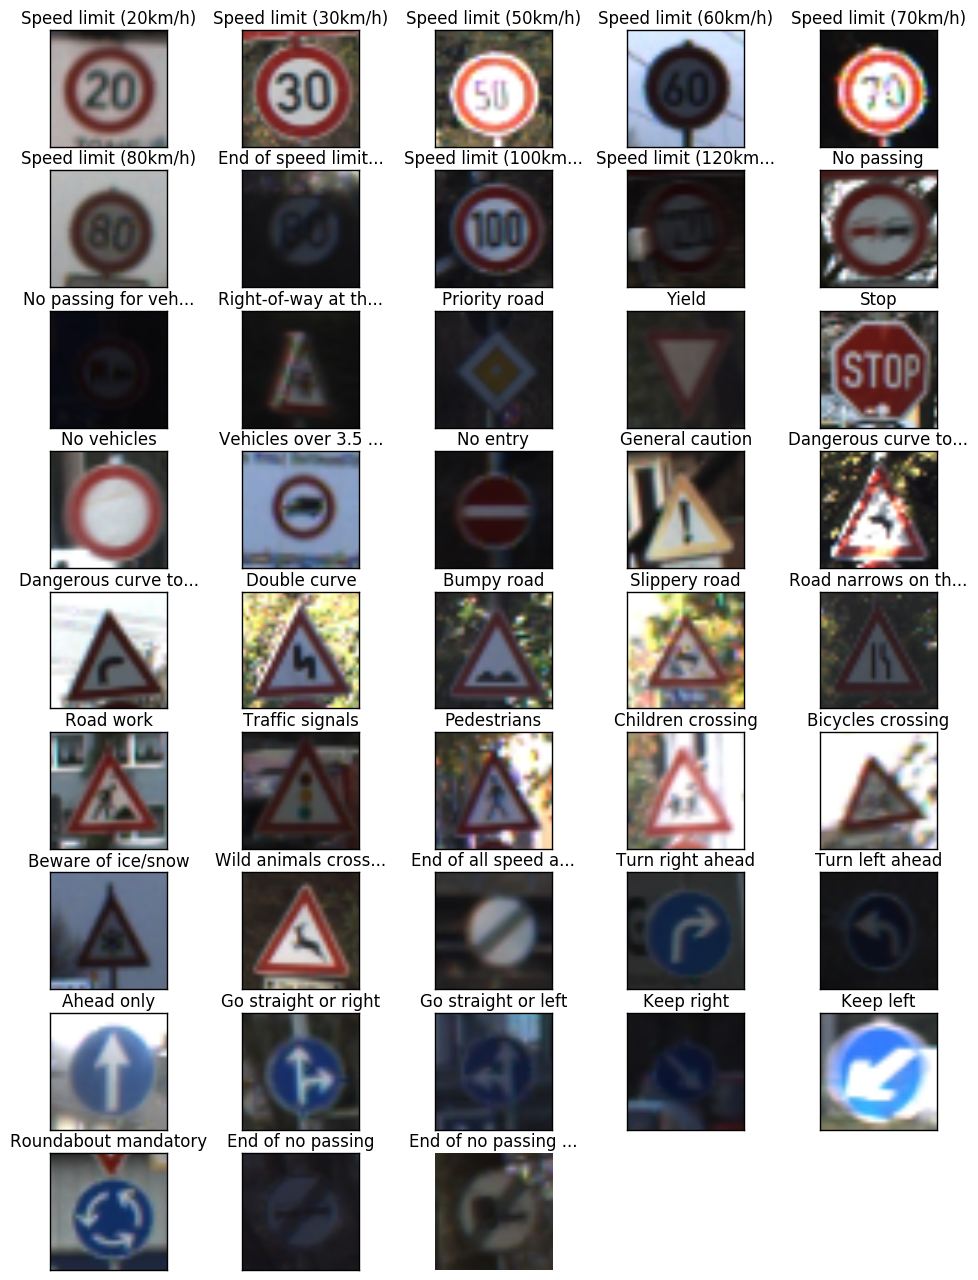

In [270]:
### Get label names from CSV.
y_labels = []
with open('signnames.csv', 'rt') as signnames_csv:
    csv_reader = csv.reader(signnames_csv, delimiter=',', quoting=csv.QUOTE_NONE)
    for row in csv_reader:
        y_labels.append(row[1])
# Exclude title row.
y_labels = y_labels[1:]

### Show traffic sign sample images.
print("Showing random sample images.")

# Set view size.
plt.rcParams['figure.figsize'] = (12, 16)

# Get indices in X_train of each type of sign
X_indices = {}
for i in range(n_classes):
    X_indices[i] = []
for j in range(len(y_train)):
    X_indices[y_train[j]].append(j)

# Display a sample of each sign type from the dataset.
for i in range(0,n_classes):
    ax = plt.subplot(9,5,i+1)
    example_image = X_train[random.choice(X_indices[i])].squeeze()
    fig = plt.imshow(example_image)
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    img_title = y_labels[i]
    if len(img_title) > 20:
        img_title = img_title[:18]+"..."
    ax.set_title(img_title)
plt.axis('off')
plt.show()

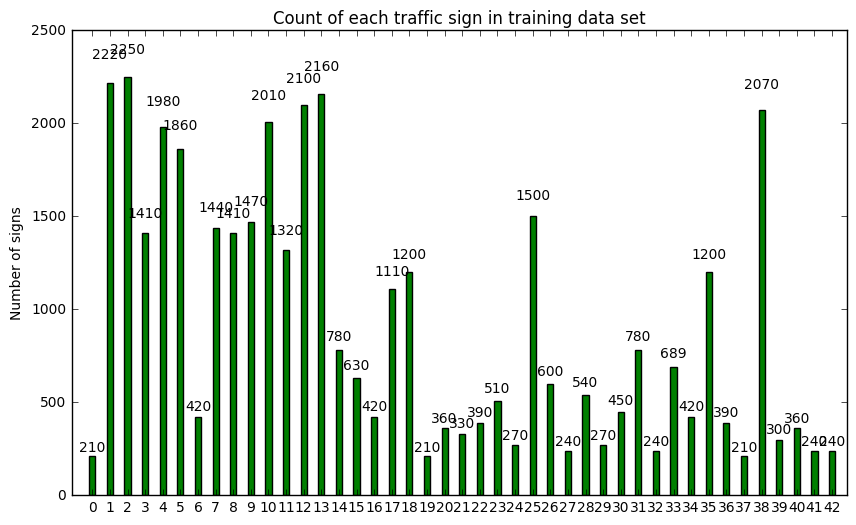

Legend:
0 - Speed limit (20km/h)
1 - Speed limit (30km/h)
2 - Speed limit (50km/h)
3 - Speed limit (60km/h)
4 - Speed limit (70km/h)
5 - Speed limit (80km/h)
6 - End of speed limit (80km/h)
7 - Speed limit (100km/h)
8 - Speed limit (120km/h)
9 - No passing
10 - No passing for vehicles over 3.5 metric tons
11 - Right-of-way at the next intersection
12 - Priority road
13 - Yield
14 - Stop
15 - No vehicles
16 - Vehicles over 3.5 metric tons prohibited
17 - No entry
18 - General caution
19 - Dangerous curve to the left
20 - Dangerous curve to the right
21 - Double curve
22 - Bumpy road
23 - Slippery road
24 - Road narrows on the right
25 - Road work
26 - Traffic signals
27 - Pedestrians
28 - Children crossing
29 - Bicycles crossing
30 - Beware of ice/snow
31 - Wild animals crossing
32 - End of all speed and passing limits
33 - Turn right ahead
34 - Turn left ahead
35 - Ahead only
36 - Go straight or right
37 - Go straight or left
38 - Keep right
39 - Keep left
40 - Roundabout mandatory
41 

In [271]:
### Show graph of counts.
# Set view size.
plt.rcParams['figure.figsize'] = (10, 6)

# Count each type of sign
counts_dict = collections.Counter(y_train)
counts = []
for key in sorted(counts_dict):
    counts.append(counts_dict[key])

# Setup graph.
graph_x = np.arange(n_classes)
bar_width = 0.35

fig, ax = plt.subplots()
bars = ax.bar(graph_x, counts, bar_width, color='g')

# Add graph metadata.
ax.set_ylabel('Number of signs')
ax.set_title('Count of each traffic sign in training data set')
ax.set_xticks(graph_x + bar_width / 2)
ax.set_xticklabels(graph_x)

def add_labels(rects):
    for i in range(0,len(rects)):
        rect = rects[i]
        r_coords = [rect.get_x(), rect.get_y()]
        r_size = [rect.get_width(), rect.get_height()]
        label_x = r_coords[0] + r_size[0]/2.
        label_y = 1.05*r_size[1]
        ax.text(label_x, label_y, '%d' % int(r_size[1]), ha='center', va='bottom')

add_labels(bars)

plt.xlim([-1,43])
plt.ylim([0,2500])
plt.show()

print("Legend:")
for i in range(n_classes):
    print("{} - {}".format(i, y_labels[i]))

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [272]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

def normalize_image_data(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized.
    :return: Normalized image data
    """
    a = 0.1
    b = 0.9
    data_min = np.amin(image_data)
    data_max = np.amax(image_data)
    numerator = (image_data - data_min)*(b-a)
    denominator = data_max - data_min
    new_data = a + (numerator / denominator)
    return new_data

# Shuffle and normalize the data.

X_train, y_train = shuffle(X_train, y_train)
X_train = normalize_image_data(X_train)
X_test = normalize_image_data(X_test)

assert np.amin(X_train) == 0.1 and np.amax(X_train) == 0.9, "Training data not normalized."
assert np.amin(X_test) == 0.1 and np.amax(X_test) == 0.9, "Testing data not normalized."
print ("Normalizing succeeded.")

Normalizing succeeded.


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

> First, I shuffled the training data so that the initial order of the data does not impact the fitness of the model. Next, I normalized the data using Min-Max scaling to a range of [0.1, 0.9] to ensure the arbitrary pixel values do not impact the fitness of the model.

In [273]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
# Create validation set from training data.

from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

n_train = len(X_train)
n_validation = len(X_validation)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)

Number of training examples = 31367
Number of validation examples = 7842


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

> The training and testing data are taken directly from the files. No additional data was generated. However, the validation data is created by taking a random 20% sample from the training data to be excluded from training. This is to ensure that some data is left over to be used to validate the performance of the model on new (unseen) data.

In [274]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

# Weights for Convolutional layer:
# tf.Variable(tf.truncated_normal(
#                [filter_size_width, filter_size_height, input_depth, k_output]))

# new_height = (input_height - filter_height + 2 * P)/S + 1
# new_width = (input_width - filter_width + 2 * P)/S + 1

def assert_shape(name, actual_shape, desired_shape):
    assert actual_shape[1:] == desired_shape, (name+" wrong shape: {}").format(actual_shape)
    
# A convolutional layer with biases and RELU activation.
def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, 
                     strides=[1, strides, strides, 1], 
                     padding='VALID')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

# Max pooling.
def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='VALID')

# Build the network.
def TrafficNet(x, dropout):
    # Arguments used for tf.truncated_normal, randomly defines 
    # variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Store layers weight & bias
    weights = {
        'wc1': tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean=mu, stddev=sigma), name='wc1'),
        'wc2': tf.Variable(tf.truncated_normal(shape=(3, 3, 6, 10), mean=mu, stddev=sigma), name='wc2'),
        'wc3': tf.Variable(tf.truncated_normal(shape=(3, 3, 10, 16), mean=mu, stddev=sigma), name='wc3'),
        'wd1': tf.Variable(tf.truncated_normal(shape=(5*5*16, 120), mean=mu, stddev=sigma), name='wd1'),
        'wd2': tf.Variable(tf.truncated_normal(shape=(120, 86), mean=mu, stddev=sigma), name='wd2'),
        'wd3': tf.Variable(tf.truncated_normal(shape=(86, 43), mean=mu, stddev=sigma), name='wd3')}

    biases = {
        'bc1': tf.Variable(tf.zeros([6]), name='bc1'),
        'bc2': tf.Variable(tf.zeros([10]), name='bc2'),
        'bc3': tf.Variable(tf.zeros([16]), name='bc3'),
        'bd1': tf.Variable(tf.zeros([120]), name='bd1'),
        'bd2': tf.Variable(tf.zeros([86]), name='bd2'),
        'bd3': tf.Variable(tf.zeros([43]), name='bd3')}
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    # 28 = (32-5+(2*0))/1 + 1
    c1 = conv2d(x, weights['wc1'], biases['bc1'], strides=1)
    assert_shape("c1", c1.get_shape(), (28,28,6))

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    # 14 = (28-2+(2*0))/2 + 1
    p1 = maxpool2d(c1, k=2)
    assert_shape("p1", p1.get_shape(), (14,14,6))

    # Layer 2: Convolutional. Output = 12x12x10.
    # 12 = (14-3+(2*0))/1 + 1
    c2 = conv2d(p1, weights['wc2'], biases['bc2'], strides=1)
    assert_shape("c2", c2.get_shape(), (12,12,10))

    # Layer 3: Convolutional. Input = 12x12x10. Output = 10x10x16.
    # 10 = (12-3+(2*0))/1 + 1
    c3 = conv2d(c2, weights['wc3'], biases['bc3'], strides=1)
    assert_shape("c3", c3.get_shape(), (10,10,16))

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    # 5 = (10-2+(2*0))/2 + 1
    p3 = maxpool2d(c3, k=2)
    assert_shape("p3", p3.get_shape(), (5,5,16))

    # Flatten. Input = 5x5x16. Output = 400.
    f = flatten(p3)
    assert_shape("f", f.get_shape(), (400))
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1 = tf.reshape(f, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    assert_shape("fc1", fc1.get_shape(), (120))
    
    # Dropout weights randomly.
    fc1 = tf.nn.dropout(fc1, dropout)
    
    # Activation.
    a3 = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 86.
    fc2 = tf.add(tf.matmul(a3, weights['wd2']), biases['bd2'])
    assert_shape("fc2", fc2.get_shape(), (86))
    
    # Activation.
    a4 = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 86. Output = 43.
    fc3 = tf.add(tf.matmul(a4, weights['wd3']), biases['bd3'])
    assert_shape("fc3", fc3.get_shape(), (43))
    
    print ("All ConvNet layers have correct output shapes.")
    
    return fc3

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

> Here is the final architecture of my model:

> 1. Convolutional Layer (with RELU activation)
2. Max Pooling
3. Convolutional Layer (with RELU activation)
4. Convolutional Layer (with RELU activation)
5. Max Pooling
6. Flatten
7. Fully Connected Layer (with Dropout and RELU activation)
8. Fully Connected Layer (with RELU activation)
9. Fully Connected Layer

In [275]:
### Train your model here.
### Feel free to use as many code cells as needed.

EPOCHS = 10
BATCH_SIZE = 128

# Placeholder for a batch of input images.
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
# Placeholder for a batch of output labels.
y = tf.placeholder(tf.int32, (None))
# Placeholder for dropout.
keep_prob = tf.placeholder(tf.float32)
# Make sure labels are one-hot encoded.
one_hot_y = tf.one_hot(y, n_classes)

learning_rate = 0.001
dropout = 0.75 # 25% of weights are randomly dropped

logits = TrafficNet(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_operation = optimizer.minimize(loss_operation)
saver = tf.train.Saver()

### Evaluation function from LeNet Lab.

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, 
                            feed_dict={x: batch_x, y: batch_y, keep_prob: 1.})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train the model.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, n_train, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, 
                     feed_dict={x: batch_x, y: batch_y, keep_prob: dropout})
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    saver.save(sess, './trafficnet')
    print("Model saved")

All ConvNet layers have correct output shapes.
Training...

EPOCH 1 ...
Validation Accuracy = 0.728

EPOCH 2 ...
Validation Accuracy = 0.886

EPOCH 3 ...
Validation Accuracy = 0.921

EPOCH 4 ...
Validation Accuracy = 0.943

EPOCH 5 ...
Validation Accuracy = 0.955

EPOCH 6 ...
Validation Accuracy = 0.957

EPOCH 7 ...
Validation Accuracy = 0.967

EPOCH 8 ...
Validation Accuracy = 0.970

EPOCH 9 ...
Validation Accuracy = 0.973

EPOCH 10 ...
Validation Accuracy = 0.980

Model saved


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

> I trained my model using the Adam Optomizer, since it is a slightly more sophisticated optimizer than the Gradient Descent Optimizer. It uses a batch size of 128, with 10 epochs.

> The model's hyperparameters include a learning rate of 0.001 (0.1%), and a dropout rate of 0.25 (25%). This means that 25% of the weights are randomly dropped after the first Fully Connected Layer, in order to introduce redundancy into the structure of the model and therefore avoid overfitting to the training dataset.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

> At first, I simply used the LeNet model from the LeNet Lab, which achieved around a 96% accuracy on the training data. This was good, but I thought I could do better.

> First, I decided to try making the network a little bit deeper. While the LeNet model uses only 2 Convolutional Layers before flattening into the Fully Connected Layers, I decided to add a 3rd Conv Layer. I also decided to remove the Max Pooling operation from the 2nd Conv Layer, and only do Max Pooling after the 1st and 3rd Conv Layers. I combined these changes in such a way that the shape of the data after my 3rd Conv Layer & Max Pooling was the same as it was after the 2nd Conv Layer & Max Pooling in the LeNet model, so the shapes remained the same in the Fully Connected Layers. As a result, in my model, even though the shape of the data transforms in almost the same way as in the LeNet model, it is now one layer deeper. Finally, I decided to add dropout to the first Fully Connected Layer (with a 75% probability that a given weight will be kept).

> This approach is not a well known architecture as far as I know, but my reasoning for making these change was as follows: I realized that I was probably losing potentially valuable data from the Max Pooling operation after the 2nd Conv Layer. Going from one Conv Layer directly into another Conv Layer is actually very similar to performing Max Pooling, but with one subtle but important difference: instead of taking the max value of small groups of data, the data is combined in a linear fashion (with weights and biases). This means that, unlike with Max Pooling, the proximity of data has no impact on the way it is combined. Theoretically, this means that the model can make smarter decisions about small image features whose proximity to each other is arbitrary. A notable drawback, however, is that using one additional Layer and one additional Max Pooling operation is computationally more expensive. Finally, my reasoning for using dropout was to ensure that the model had redundancies in order to avoid overfitting to the training data.

> All of these changes resulted in an increase in accuracy of ~2% to 98%.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

New data with Actual Labels.


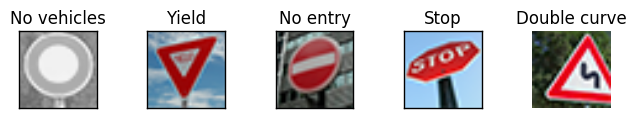

In [291]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
from scipy import misc

print("New data with Actual Labels.")

# Load images.
my_data = []
for i in range(1,6):
    img = misc.imread('my_test_data/{}.png'.format(i))
    my_data.append(img)
    
my_data_y = [15,13,17,14,21]
    
# Show my data images.
plt.rcParams['figure.figsize'] = (8, 1)
for i in range(len(my_data)):
    ax = plt.subplot(1,5,i+1)
    example_image = my_data[i]
    fig = plt.imshow(example_image)
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    img_title = y_labels[my_data_y[i]]
    if len(img_title) > 20:
        img_title = img_title[:18]+"..."
    ax.set_title(img_title)
plt.axis('off')
plt.show()

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

> All of these images were taken from the internet (sources are provided in `my_test_data/sources.md`). I intentionally made the 1st image grayscale (1 channel), because my training data is all in color (3 channels). The 2nd image is an American Yield sign (includes the 'Yield' text not present on German signs), which might not appear in the training data. The 3rd image is out of focus so that the sign in the foreground is very blurry and the building behind it adds a lot of noise to the background. The 4th image is from a very strange perspective. The 5th image is cropped so that only the left part of the sign is visible. These could all prove challenging for the model to predict. More potential challenges that aren't explored here are rotation, skewing, and obstruction of the images.

In [304]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_validation, y_validation)
    print("Test Accuracy of Validation Data = {:.3f}".format(test_accuracy))
    print()
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(my_data, my_data_y)
    print("Test Accuracy of New Data = {:.3f}".format(test_accuracy))
    print("Actual Labels for New Data:", my_data_y)
    predictions = tf.argmax(tf.nn.softmax(logits),1)
    pred = sess.run(predictions, feed_dict={x: my_data, keep_prob: 1.})
    print("Predictions for New Data:", pred)
    top_3 = sess.run(tf.nn.top_k(logits, k=3), feed_dict={x: my_data, keep_prob: 1.})
    print("Top 3 predictions for New Data:")
    print(top_3.indices)

Test Accuracy of Validation Data = 0.980

Test Accuracy of New Data = 0.400
Actual Labels for New Data: [15, 13, 17, 14, 21]
Predictions for New Data: [15 13 13 12 20]
Top 3 predictions for New Data:
[[15 33 38]
 [13  3 15]
 [13 28  9]
 [12 26 14]
 [20  9 26]]


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

> The model is 40% accurate on my new data, whereas it is 98% accurate on the validation data.

New data with Predicted Labels.


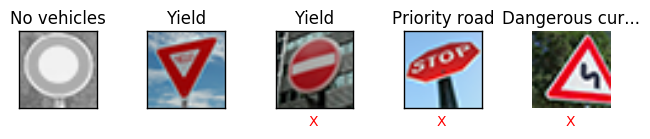

In [305]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
print("New data with Predicted Labels.")
# Show predictions.
plt.rcParams['figure.figsize'] = (8, 1)
for i in range(len(my_data)):
    ax = plt.subplot(1,5,i+1)
    example_image = my_data[i]
    fig = plt.imshow(example_image)
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    img_title = y_labels[pred[i]]
    if len(img_title) > 15:
        img_title = img_title[:13]+"..."
    ax.set_title(img_title)
    subtitle = ""
    if pred[i] != my_data_y[i]:
        subtitle = "X"
    ax.text(15, 40, subtitle, ha='center', va='bottom', color='red')
plt.axis('off')
plt.show()

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> It's 40% accurate on new data, so not terrible, but not great either. I am not surprised that it was able to correctly predict the 2nd image (Yield) because the shape and color of the sign's borders are quite unique, whereas the pixels of the text in the middle of the sign might not be as heavily activated. However, I am a little surprised that it was able to accurately predict the 1st image in grayscale, since all of the training data was provided in color. Also, it is worth noting that for the 4th image, **the correct label (14 - Stop) was in the top 3 predictions**.

> In order to make the model more resiliant and be able to correctly classify the last 3 images, it could be trained on more images with blurry foregrounds and noisy backgrounds (for Image 3), images from strange perspectives (for Image 4), and cropped images (for Image 5).

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.